# **Servo Prediction using Linear Regression**

-------------

## **Objective**

Servo prediction using linear regression aims to predict the behavior or position of a servo motor based on various input parameters. This kind of problem can be approached by applying machine learning techniques, particularly linear regression, to model the relationship between the input features and the target variable.

## **Data Source**

## **Import Library**

In [1]:
import pandas as pd
import numpy as np

## **Import Data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Servo%20Mechanism.csv')

## **Describe Data**

In [3]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [5]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


## **Data Visualization**

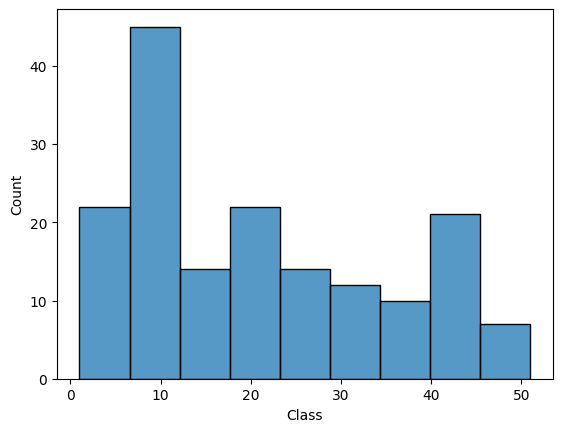

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Class'])
plt.show()

## **Data Preprocessing**

In [7]:
df.isnull().sum()

Motor    0
Screw    0
Pgain    0
Vgain    0
Class    0
dtype: int64

In [8]:
df = df.drop_duplicates()

# Get Categories and counts of categorical values

In [9]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [10]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

# Get Encoding Of Categorical Features

In [11]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [12]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

## **Define Target Variable (y) and Feature Variables (X)**

In [13]:
y=df['Class']

In [14]:
y.shape

(167,)

In [15]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [16]:
X=df[['Motor','Screw','Pgain','Vgain']]

In [17]:
X = df.drop(['Class'],axis=1)

In [18]:
X.shape

(167, 4)

In [19]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


## **Train Test Split**

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

## **Modeling**

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

## **Prediction**

In [26]:
y_pred = model.predict(X_test)

In [27]:
y_pred.shape

(51,)

In [28]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

## **Model Evaluation**

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 7.190539677251235
Mean Squared Error: 66.03589175595563
R-squared: 0.6807245170563927


# Get Visualization of Actual vs predicted results

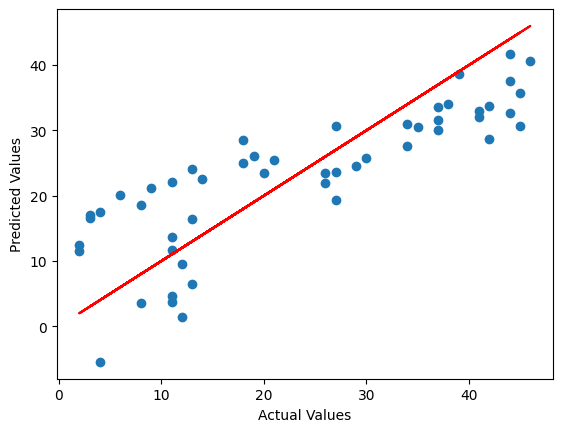

In [32]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Get Future Predictions

In [33]:
X_new = df.sample(1)

In [34]:
X_new

,Motor,Screw,Pgain,Vgain,Class
23,0,2,4,2,13


In [35]:
X_new.shape

(1, 5)

In [36]:
X_new = X_new.drop(['Class'],axis=1)

In [37]:
X_new

,Motor,Screw,Pgain,Vgain
23,0,2,4,2


In [38]:
X_new.shape

(1, 4)

In [39]:
y_pred_new = model.predict(X_new)

In [40]:
y_pred_new

array([24.1198037])

## **Explanation**

In summary, by following a structured approach to data preprocessing, model training, and evaluation, linear regression can be effectively used for servo prediction. Handling non-numeric values and ensuring data quality are critical steps to avoid errors and achieve reliable predictions. This methodology not only aids in understanding the servo behavior but also provides a foundation for further enhancements and more complex models in the future.